In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
from functools import partial
np.set_printoptions(threshold=sys.maxsize)

In [2]:
from datetime import date, timedelta
import locale
import io
import requests
try:
    locale.setlocale(locale.LC_ALL, 'pt_BR')
except:
    locale.setlocale(locale.LC_ALL, 'Portuguese_Brazil')

data_atual = date(2021,7,12)

data_atual.strftime('%d de %B de %Y')

url="https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-13-07-2021.csv"
s=requests.get(url).content
dferror = pd.read_csv(io.StringIO(s.decode('utf-8')),sep= ';')

In [3]:
data = date.today()

df = dferror
d = 0
while df.columns[0] == dferror.columns[0]:
    data = data - timedelta(days=d)
    #https://opendatasus.saude.gov.br/dataset/bd-srag-2020/resource/d89ea107-4a2b-4bd5-8b8b-fa1caaa96550
    url = "https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-"+ str(data.strftime('%d-%m-%Y')) +".csv"
    s=requests.get(url).content
    df=pd.read_csv(io.StringIO(s.decode('utf-8')),sep= ';')
    d=+ 1

C:\Users\fumio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,18,60,62,63,64,92,94,106,115,117,118,119,123,144) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data

datetime.date(2021, 7, 19)

In [5]:
data1 = date.today()

df1 = dferror
d = 0
while df1.columns[0] == dferror.columns[0]:
    data1 = data1 - timedelta(days=d)
    #https://opendatasus.saude.gov.br/dataset/bd-srag-2021/resource/42bd5e0e-d61a-4359-942e-ebc83391a137
    url = "https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2021/INFLUD21-"+ str(data.strftime('%d-%m-%Y')) +".csv"
    s=requests.get(url).content
    df1=pd.read_csv(io.StringIO(s.decode('utf-8')),sep= ';')
    d=+ 1

C:\Users\fumio\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,18,60,62,63,64,92,94,106,108,115,117,118,119,123,144) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
data1

datetime.date(2021, 7, 25)

In [8]:
print("df tem {} elementos de {}. df1 tem {} elementos de {}".format(df.shape[0],data,df1.shape[0],data1))

df tem 1196954 elementos de 2021-07-19. df1 tem 1264480 elementos de 2021-07-25


In [9]:
df.rename(str.lower, axis='columns', inplace=True)
df1.rename(str.lower, axis = 'columns', inplace=True)

In [10]:
dados_filtrados = df[['nu_idade_n','dt_notific','dt_nasc','pcr_sars2','classi_fin', 'hospital' , 'uti', 'evolucao', 'dt_evoluca']]
dados_filtrados1 = df1[['nu_idade_n','dt_notific','dt_nasc','pcr_sars2','classi_fin', 'hospital' , 'uti', 'evolucao', 'dt_evoluca']]

dados_filtrados = pd.concat([dados_filtrados,dados_filtrados1])

dados_filtrados.head(15)
print(dados_filtrados.shape)

(2461434, 9)


In [11]:
dados_filtrados = dados_filtrados.query('classi_fin == 5 & evolucao == 2')
selection = dados_filtrados['dt_evoluca'].notna()
dados_filtrados = dados_filtrados[selection]
print(dados_filtrados.shape)

(512514, 9)


In [12]:
print('Quantidade de pessoas que tinham mais que 100 anos é {}'.format(dados_filtrados.query('nu_idade_n > 100').nu_idade_n.count()))

Quantidade de pessoas que tinham mais que 100 anos é 881


In [13]:
dados_filtrados.reset_index(inplace=True)
dados_filtrados.drop(columns= 'index', inplace= True)
dados_filtrados.head()

,nu_idade_n,dt_notific,dt_nasc,pcr_sars2,classi_fin,hospital,uti,evolucao,dt_evoluca
0,82,04/04/2020,05/01/1938,1.0,5.0,1.0,1.0,2.0,21/04/2020
1,84,08/04/2020,14/11/1935,1.0,5.0,1.0,NaN,2.0,12/04/2020
2,68,01/04/2020,02/10/1951,1.0,5.0,1.0,2.0,2.0,15/04/2020
3,84,03/04/2020,12/04/1935,1.0,5.0,1.0,2.0,2.0,18/04/2020
4,76,09/04/2020,15/02/1944,1.0,5.0,1.0,NaN,2.0,29/04/2020


# Primeira versão da análise (1709 segundos)

In [14]:
# from datetime import datetime
# import time

# start = time.perf_counter()

# for i in range(0,dados_filtrados.shape[0]):
#       dados_filtrados.dt_evoluca[i] = datetime.strptime(dados_filtrados.dt_evoluca[i], '%d/%m/%Y')

# finish = time.perf_counter()

# print(f'Finished in {round(finish-start,2)} second(s) to execute {dados_filtrados.shape[0]} dates')

<ipython-input-14-a703d1e47580>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados.dt_evoluca[i] = datetime.strptime(dados_filtrados.dt_evoluca[i], '%d/%m/%Y')


Finished in 1709.78 second(s) to execute 512514 dates


# Testando uma segunda forma de processamento para diminuir o tempo necessário (5,83s)

In [15]:
from datetime import datetime
import time

start = time.perf_counter()

new_dates = []

for date in dados_filtrados.dt_evoluca:
    new_dates.append(datetime.strptime(date, '%d/%m/%Y'))
dados_filtrados.dt_evoluca = new_dates

finish = time.perf_counter()

print(f'Finished in {round(finish-start,2)} second(s) to execute {dados_filtrados.shape[0]} dates')

In [16]:
dados_filtrados.head()

,nu_idade_n,dt_notific,dt_nasc,pcr_sars2,classi_fin,hospital,uti,evolucao,dt_evoluca
0,82,04/04/2020,05/01/1938,1.0,5.0,1.0,1.0,2.0,2020-04-21 00:00:00
1,84,08/04/2020,14/11/1935,1.0,5.0,1.0,NaN,2.0,2020-04-12 00:00:00
2,68,01/04/2020,02/10/1951,1.0,5.0,1.0,2.0,2.0,2020-04-15 00:00:00
3,84,03/04/2020,12/04/1935,1.0,5.0,1.0,2.0,2.0,2020-04-18 00:00:00
4,76,09/04/2020,15/02/1944,1.0,5.0,1.0,NaN,2.0,2020-04-29 00:00:00


## Verificando a data do último caso de óbito

In [45]:
data_ref = dados_filtrados.dt_evoluca.max()

## Procurando outliers

In [46]:
dados_filtrados = dados_filtrados.query('nu_idade_n <= 124')

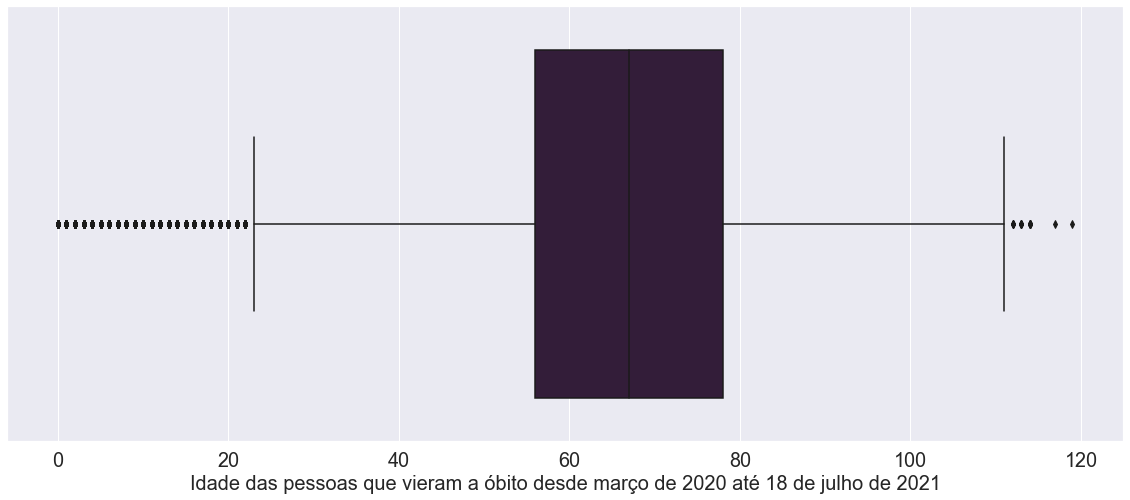

In [47]:
import seaborn as sns
sns.set_palette("rocket")

ax = sns.boxplot(data = dados_filtrados, x = 'nu_idade_n' )
ax.set_xlabel("Idade das pessoas que vieram a óbito desde março de 2020 até {}".format(data_ref.strftime('%d de %B de %Y')),
              fontsize = 20)
ax.figure.set_size_inches(20,8)
sns.set(font_scale = 1.8)

C:\Users\fumio\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


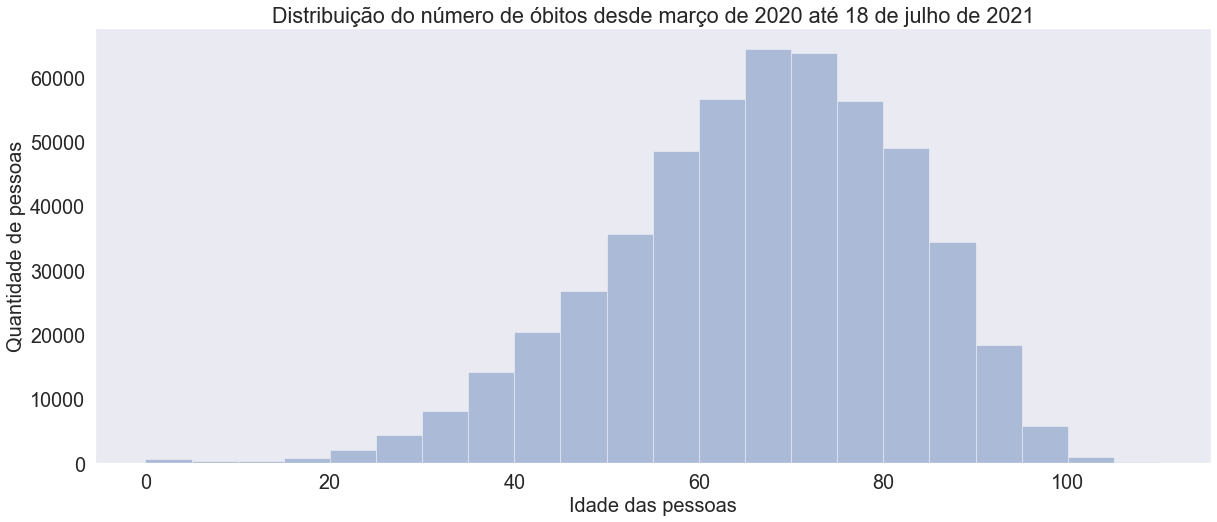

In [48]:
ax = sns.distplot(dados_filtrados.nu_idade_n, kde = False, 
                  bins = [i*5 for(i) in range (23)])
ax.set_xlabel("Idade das pessoas", 
              fontsize = 20, position=(0.5,0))
ax.set_ylabel("Quantidade de pessoas", 
              fontsize = 20, position=(0.5,0.5))
ax.grid(None)

ax.set_title('Distribuição do número de óbitos desde março de 2020 até {}'.format(data_ref.strftime('%d de %B de %Y')))

ax.figure.set_size_inches(20,8)

# Gerando o gráfico 1

In [49]:
#dados_filtrados = dados_filtrados.sort_values(by= 'dt_evoluca')
categories = ['Até 10 anos','De 11 a 20 anos','De 21 a 30 anos',
                              'De 31 a 40 anos','De 41 a 50 anos','De 51 a 60 anos',
                              'De 61 a 70 anos','De 71 a 80 anos','De 81 a 90 anos','Mais de 90 anos']
faixa_idade = [dados_filtrados.nu_idade_n.min(), 10 , 20 , 30 , 40 , 50 , 60 , 
               70 , 80 , 90, dados_filtrados.nu_idade_n.max()]
dados_filtrados['faixa'] = pd.cut(dados_filtrados.nu_idade_n,
                                  bins= faixa_idade,labels = categories, 
                                  include_lowest= True)

In [50]:
dados_filtrados.index = pd.to_datetime(dados_filtrados['dt_evoluca'],format='%m/%d/%y %I:%M%p')
dados_filtrados.faixa.unique();

In [51]:
dados_data = dados_filtrados.groupby(pd.Grouper(freq= 'M'))

In [52]:
dados_data.groups;

In [53]:
df2003 = dados_data.get_group('2020-03-31')
df2004 = dados_data.get_group('2020-04-30')
df2005 = dados_data.get_group('2020-05-31')
df2006 = dados_data.get_group('2020-06-30')
df2007 = dados_data.get_group('2020-07-31')
df2008 = dados_data.get_group('2020-08-31')
df2009 = dados_data.get_group('2020-09-30')
df2010 = dados_data.get_group('2020-10-31')
df2011 = dados_data.get_group('2020-11-30')
df2012 = dados_data.get_group('2020-12-31')
df2101 = dados_data.get_group('2021-01-31')
df2102 = dados_data.get_group('2021-02-28')
df2103 = dados_data.get_group('2021-03-31')
df2104 = dados_data.get_group('2021-04-30')
df2105 = dados_data.get_group('2021-05-31')
df2106 = dados_data.get_group('2021-06-30')
df2107 = dados_data.get_group('2021-07-31')

In [54]:
todos_meses = [df2003 ,df2004 ,df2005 ,df2006 ,df2007 ,
               df2008 ,df2009 ,df2010 ,df2011 ,df2012 ,
               df2101 ,df2102 ,df2103 ,df2104 ,df2105 ,
               df2106 ,df2107]

for i in range(0,len(todos_meses)):
    #print(i)
    todos_meses[i] = todos_meses[i].groupby('faixa').nu_idade_n.count()


In [55]:
for i in range(0,len(todos_meses)):
    #print(i)
    if i+3 <= 12 :
        todos_meses[i].rename('2020 - '+"%02d" % (i+3),inplace= True)
    else:
        todos_meses[i].rename('2021 - '+"%02d" % (i-9),inplace= True)

In [56]:
de2003_ateHOJE = pd.DataFrame()

for i in range(0,len(todos_meses)):
    de2003_ateHOJE = de2003_ateHOJE.append(todos_meses[i])

In [57]:
de2003_ateHOJE = de2003_ateHOJE.T

In [58]:
de2003_ateHOJE

,2020 - 03,2020 - 04,2020 - 05,2020 - 06,2020 - 07,2020 - 08,2020 - 09,2020 - 10,2020 - 11,2020 - 12,2021 - 01,2021 - 02,2021 - 03,2021 - 04,2021 - 05,2021 - 06,2021 - 07
Até 10 anos,7.0,37.0,140.0,99.0,97.0,64.0,43.0,40.0,35.0,66.0,70.0,61.0,108.0,103.0,88.0,71.0,12.0
De 11 a 20 anos,4.0,49.0,121.0,91.0,85.0,66.0,54.0,56.0,37.0,55.0,65.0,61.0,150.0,146.0,142.0,113.0,30.0
De 21 a 30 anos,8.0,158.0,400.0,347.0,331.0,273.0,206.0,155.0,138.0,227.0,306.0,367.0,1095.0,1144.0,950.0,1042.0,301.0
De 31 a 40 anos,45.0,543.0,1229.0,1067.0,1032.0,750.0,524.0,431.0,416.0,730.0,1000.0,1083.0,3717.0,3903.0,3366.0,3679.0,1100.0
De 41 a 50 anos,50.0,1217.0,2490.0,2096.0,2126.0,1718.0,1206.0,862.0,775.0,1519.0,2010.0,2235.0,7518.0,7885.0,6794.0,7354.0,2114.0
De 51 a 60 anos,86.0,2012.0,4834.0,3925.0,4191.0,3470.0,2415.0,1702.0,1698.0,3243.0,4161.0,4189.0,12862.0,13682.0,11822.0,11230.0,3063.0
De 61 a 70 anos,177.0,3062.0,7747.0,6618.0,7051.0,6129.0,4376.0,3270.0,3276.0,6033.0,7512.0,7082.0,19463.0,20105.0,12846.0,7003.0,1912.0
De 71 a 80 anos,169.0,2944.0,8302.0,7455.0,7780.0,6916.0,5037.0,3670.0,3737.0,6716.0,8440.0,7287.0,18415.0,15951.0,7382.0,5640.0,1787.0
De 81 a 90 anos,134.0,2134.0,6045.0,5522.0,5883.0,5065.0,3858.0,2664.0,2761.0,5149.0,6058.0,5242.0,10594.0,6583.0,4458.0,4370.0,1348.0
Mais de 90 anos,38.0,584.0,1728.0,1611.0,1612.0,1412.0,943.0,745.0,778.0,1389.0,1635.0,1382.0,2322.0,1426.0,1187.0,1064.0,416.0


In [59]:
de2003_ateHOJE_porcentagem = pd.DataFrame()

for mes in de2003_ateHOJE:
    de2003_ateHOJE_porcentagem[str(mes)] = (de2003_ateHOJE[mes].values/de2003_ateHOJE[mes].values.sum())

de2003_ateHOJE_porcentagem.index = de2003_ateHOJE.index

<ipython-input-60-362ecd1b1fec>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%' , '20%', '40%' , '60%', '80%', '100%'])


Text(0.5, 0, 'Ano-mês')

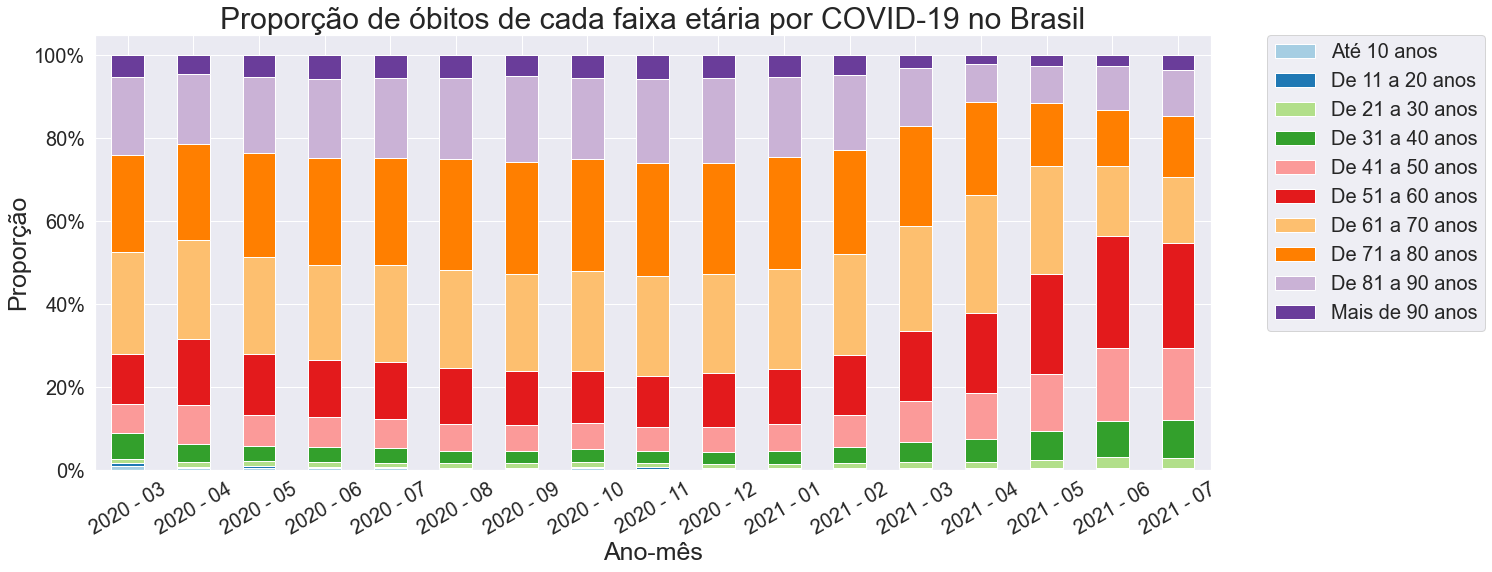

In [60]:
sns.set_palette("Paired")

ax = de2003_ateHOJE_porcentagem.T.plot(kind= 'bar' , stacked= True, figsize= (20,8),fontsize =20)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 20)
ax.set_yticklabels(['0%' , '20%', '40%' , '60%', '80%', '100%'])
ax.set_ylabel("Proporção",fontsize=25)
ax.set_title("Proporção de óbitos de cada faixa etária por COVID-19 no Brasil", fontsize = 30)
ax.set_xticklabels(de2003_ateHOJE.columns, rotation=30)
ax.set_xlabel("Ano-mês",fontsize=25)

# Gerando o Gráfico 2

In [61]:
faixa_idade = [dados_filtrados.nu_idade_n.min(), 60 , dados_filtrados.nu_idade_n.max()]
conteudo = ['Até 60 anos' , 'Mais de 61 anos']
dados_filtrados['faixa'] = pd.cut(dados_filtrados.nu_idade_n,bins= faixa_idade, labels = conteudo, include_lowest= True)

In [62]:
dados_filtrados.index = pd.to_datetime(dados_filtrados['dt_evoluca'],format='%m/%d/%y %I:%M%p')
dados_filtrados.faixa.unique()

['Mais de 61 anos', 'Até 60 anos']
Categories (2, object): ['Até 60 anos' < 'Mais de 61 anos']

In [63]:
dados_data = dados_filtrados.groupby(pd.Grouper(freq= 'M'))

In [64]:
dados_data.groups;

In [65]:
df2003 = dados_data.get_group('2020-03-31')
df2004 = dados_data.get_group('2020-04-30')
df2005 = dados_data.get_group('2020-05-31')
df2006 = dados_data.get_group('2020-06-30')
df2007 = dados_data.get_group('2020-07-31')
df2008 = dados_data.get_group('2020-08-31')
df2009 = dados_data.get_group('2020-09-30')
df2010 = dados_data.get_group('2020-10-31')
df2011 = dados_data.get_group('2020-11-30')
df2012 = dados_data.get_group('2020-12-31')
df2101 = dados_data.get_group('2021-01-31')
df2102 = dados_data.get_group('2021-02-28')
df2103 = dados_data.get_group('2021-03-31')
df2104 = dados_data.get_group('2021-04-30')
df2105 = dados_data.get_group('2021-05-31')
df2106 = dados_data.get_group('2021-06-30')
df2107 = dados_data.get_group('2021-07-31')

In [66]:
todos_meses = [df2003 ,df2004 ,df2005 ,df2006 ,df2007 ,
               df2008 ,df2009 ,df2010 ,df2011,df2012,
               df2101,df2102,df2103,df2104,df2105,df2106,
               df2107]

for i in range(0,len(todos_meses)):
    #print(i)
    todos_meses[i] = todos_meses[i].groupby('faixa').nu_idade_n.count()


In [67]:
for i in range(0,len(todos_meses)):
    #print(i)
    if i+3 <= 12 :
        todos_meses[i].rename('2020 - '+"%02d" % (i+3),inplace= True)
    else:
        todos_meses[i].rename('2021 - '+"%02d" % (i-9),inplace= True)

In [68]:
de2003_ateHOJE = pd.DataFrame()

for i in range(0,len(todos_meses)):
    de2003_ateHOJE = de2003_ateHOJE.append(todos_meses[i])

In [69]:
de2003_ateHOJE = de2003_ateHOJE.T

In [70]:
de2003_ateHOJE

,2020 - 03,2020 - 04,2020 - 05,2020 - 06,2020 - 07,2020 - 08,2020 - 09,2020 - 10,2020 - 11,2020 - 12,2021 - 01,2021 - 02,2021 - 03,2021 - 04,2021 - 05,2021 - 06,2021 - 07
Até 60 anos,200.0,4016.0,9214.0,7625.0,7862.0,6341.0,4448.0,3246.0,3099.0,5840.0,7612.0,7996.0,25450.0,26863.0,23162.0,23489.0,6620.0
Mais de 61 anos,518.0,8724.0,23822.0,21206.0,22326.0,19522.0,14214.0,10349.0,10552.0,19287.0,23645.0,20993.0,50794.0,44065.0,25873.0,18077.0,5463.0


In [71]:
de2003_ateHOJE_porcentagem = pd.DataFrame()

for mes in de2003_ateHOJE:
    de2003_ateHOJE_porcentagem[str(mes)] = (de2003_ateHOJE[mes].values/de2003_ateHOJE[mes].values.sum())

de2003_ateHOJE_porcentagem.index = de2003_ateHOJE.index

<ipython-input-72-030b0b565806>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%' , '20%', '40%' , '60%', '80%', '100%'])


Text(0.5, 0, 'Ano-mês')

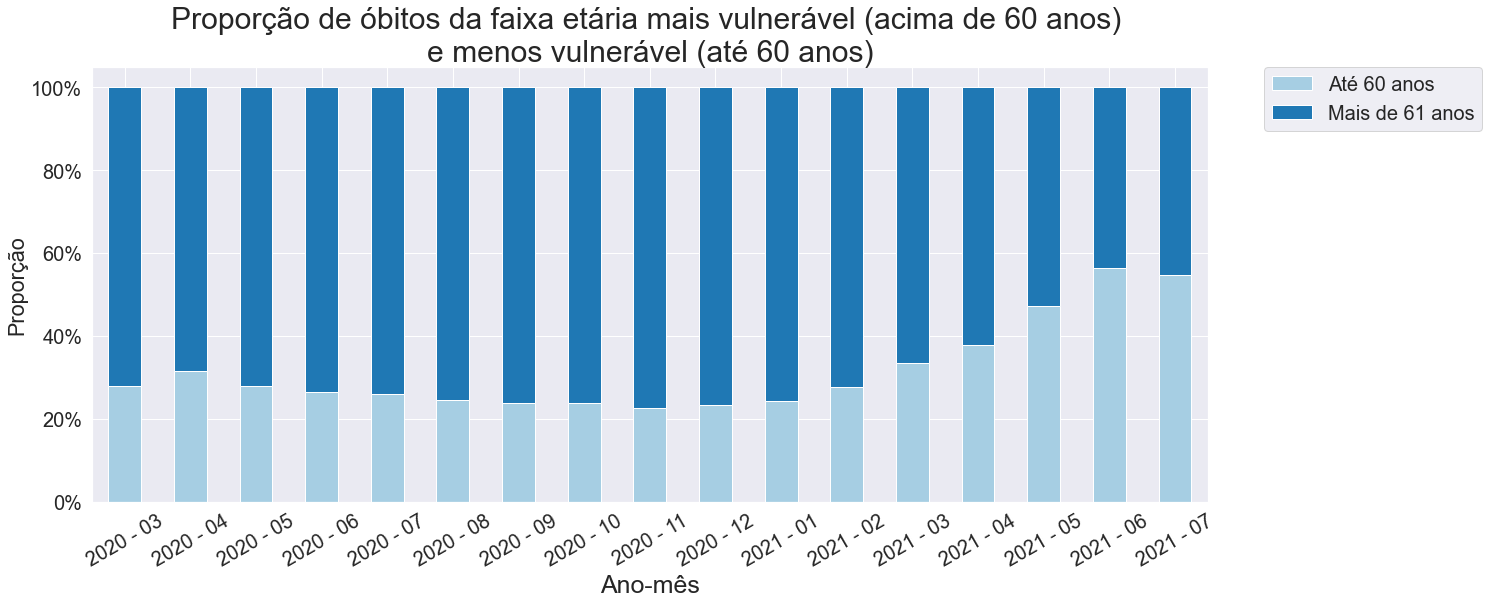

In [72]:
ax = de2003_ateHOJE_porcentagem.T.plot(kind= 'bar' , stacked= True, figsize= (20,8), fontsize =20)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 20)
ax.set_yticklabels(['0%' , '20%', '40%' , '60%', '80%', '100%'])
ax.set_ylabel("Proporção")
ax.set_title("Proporção de óbitos da faixa etária mais vulnerável (acima de 60 anos) \ne menos vulnerável (até 60 anos)", fontsize = 30)
ax.set_xticklabels(de2003_ateHOJE.columns, rotation=30)
ax.set_xlabel("Ano-mês",fontsize=25)